In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./sample_data/Tesla_Dataset.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3504,2024-05-31,178.500000,180.320007,173.820007,178.080002,178.080002,67314600
3505,2024-06-03,178.130005,182.639999,174.490005,176.289993,176.289993,68568900
3506,2024-06-04,174.779999,177.759995,174.000000,174.770004,174.770004,60056300
3507,2024-06-05,175.350006,176.149994,172.130005,175.000000,175.000000,57614800
3508,2024-06-06,174.419998,176.919998,172.729996,175.440002,175.440002,29887849


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3509 non-null   object 
 1   Open       3509 non-null   float64
 2   High       3509 non-null   float64
 3   Low        3509 non-null   float64
 4   Close      3509 non-null   float64
 5   Adj Close  3509 non-null   float64
 6   Volume     3509 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.0+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
print(df["Date"])

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3504   2024-05-31
3505   2024-06-03
3506   2024-06-04
3507   2024-06-05
3508   2024-06-06
Name: Date, Length: 3509, dtype: datetime64[ns]


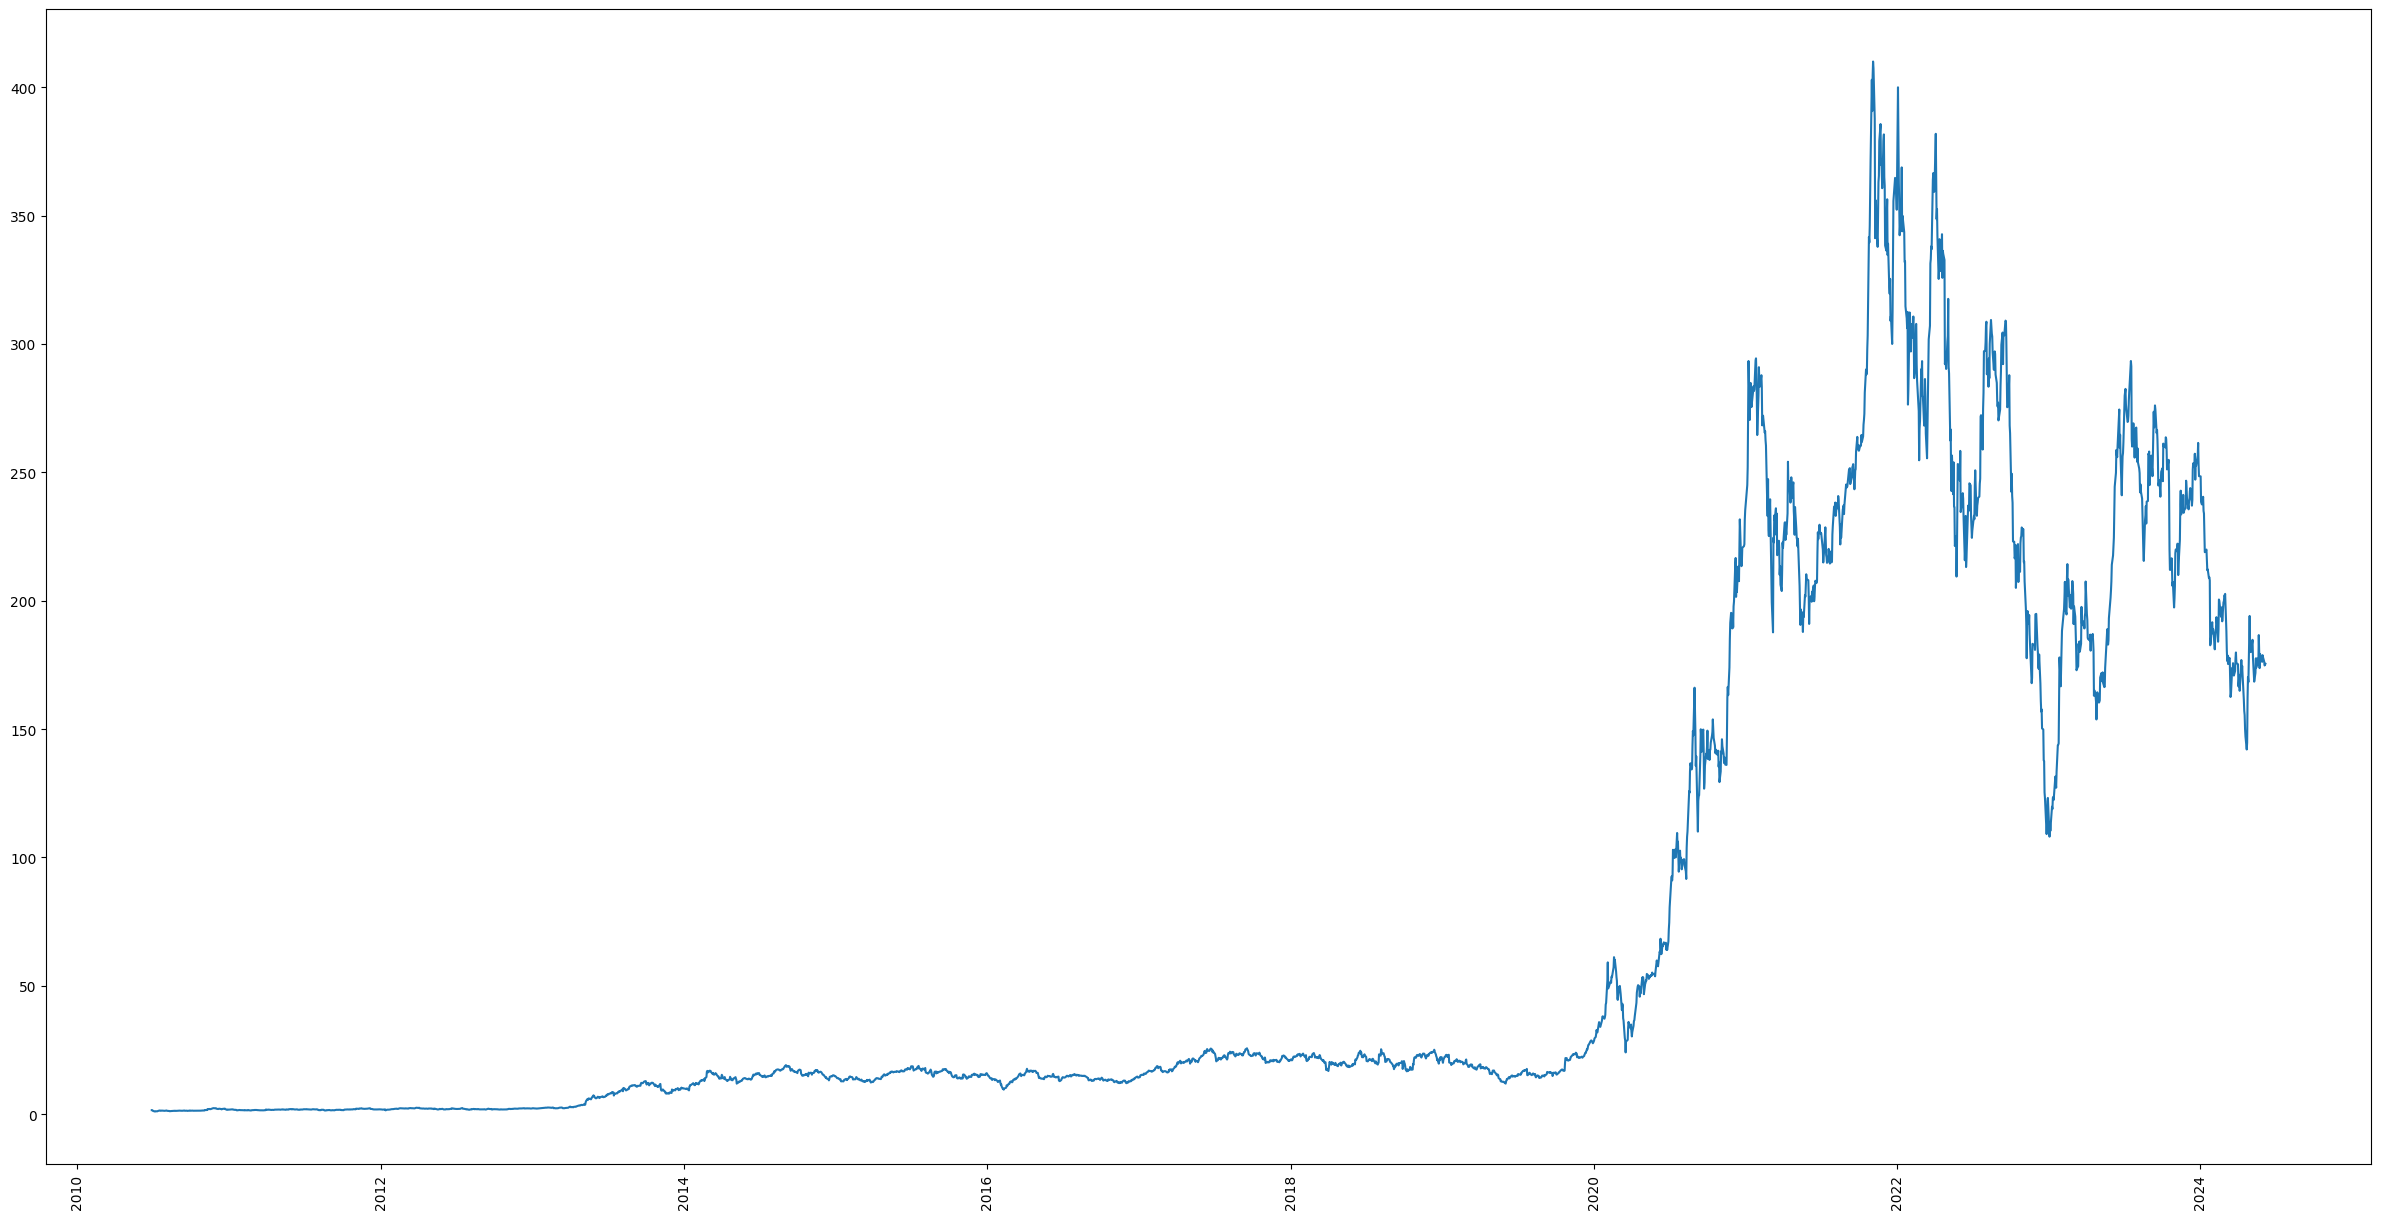

In [8]:
plt.figure(figsize = (30,15))#adjust the figure size
plt.plot(df["Date"], df["Close"])
plt.xticks(rotation = 90)#rotate x-axis 90 degree
plt.show()

## PREDICTION MODEL

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

features = ["Open", "High", "Low", "Volume"] #select the elements
X = df[features]

y = df["Close"] #the goal

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestRegressor()

In [10]:
model.fit(X_train, y_train) #train the model

RandomForestRegressor()

In [11]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 4.821037667266273


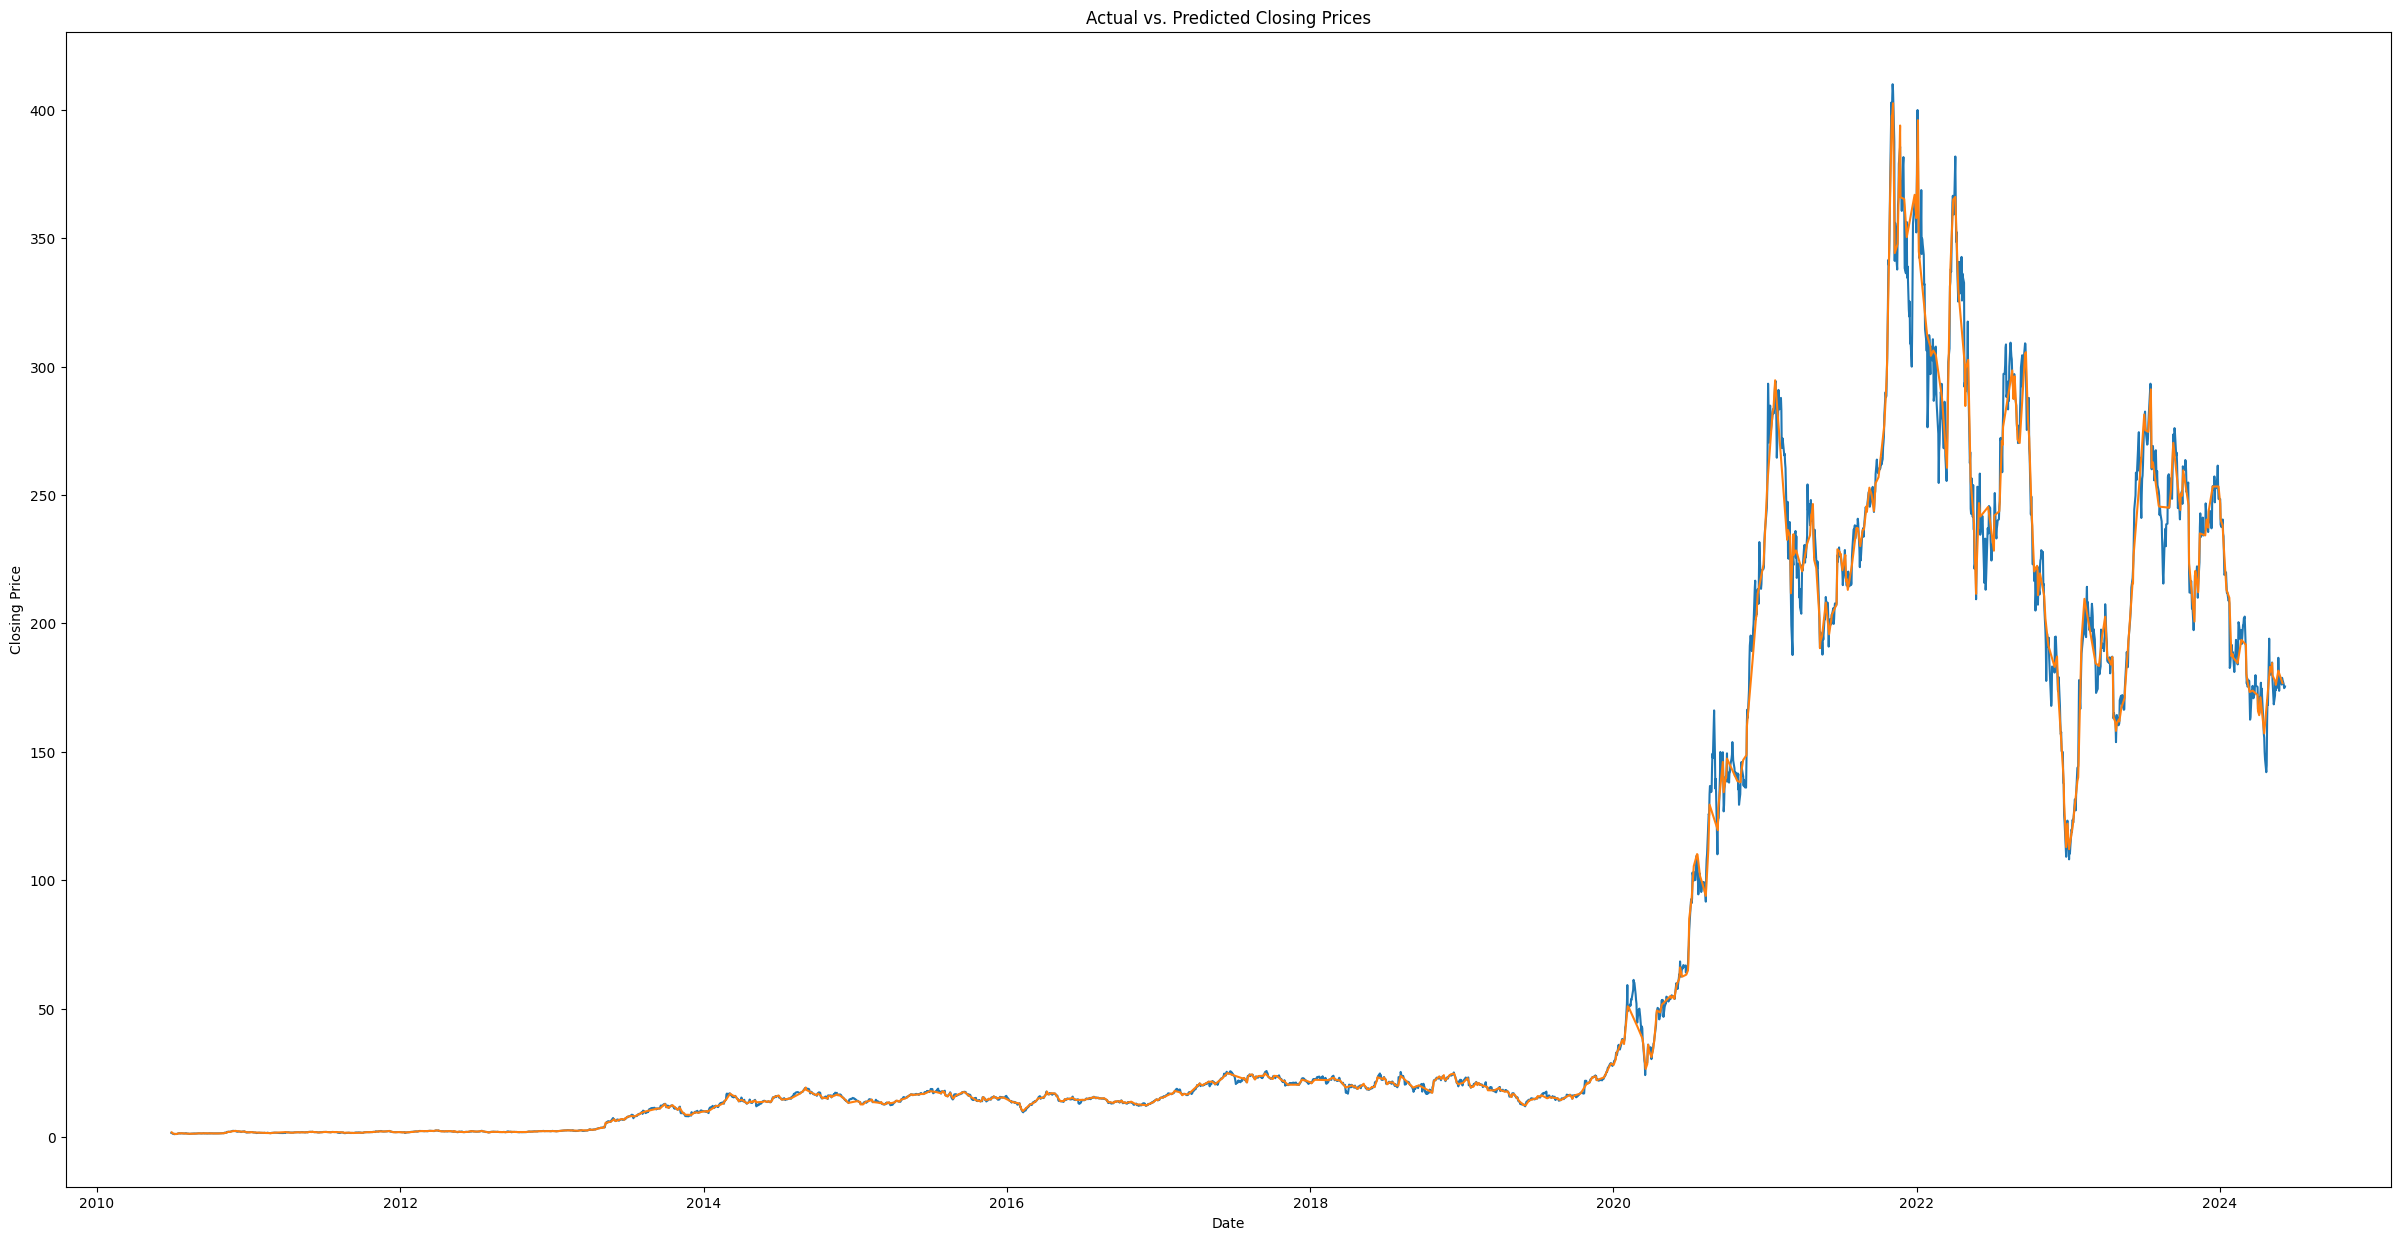

In [12]:
prediction_y = model.predict(X_test)#prediction output

dates =  df.iloc[X_test.index]["Date"]

prediction_df = pd.DataFrame({"Date": dates, "Predicted Closing Price": prediction_y})
prediction_df.sort_values("Date", inplace=True)


#draw the graph
plt.figure(figsize = (30,15))
plt.plot(df["Date"], df["Close"], label = "Actual Closing Price")
plt.plot(prediction_df["Date"], prediction_df["Predicted Closing Price"], label = "Predicted Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices")
plt.show()